In [99]:
import chess
import chess.pgn as pgn
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.ticker as ticker
import copy
from matplotlib.pyplot import figure
import matplotlib
import seaborn as sns



# Data ETL

In [3]:
players = ['Caruana', 'Polgar', 'Fischer', 'Morphy', 'Botvinnik', 'Tal',
 'Kasparov', 'Anand', 'Carlsen', 'Nakamura', 'Alekhine', 'Capablanca']

In [16]:
chess_pieces_type = [i for i in range (1, 7)]
mapp = {1: [0] * 64, 2: [0] * 64, 3: [0] * 64, 4: [0] * 64, 5: [0] * 64, 6: [0] * 64}

for player in players:
  gameList = os.listdir('../raw_game/' + player)
  for game in gameList:
    gameLink = '../raw_game/' + player + '/' + game
    
    pgn = open(gameLink)

    first_game = chess.pgn.read_game(pgn)
    board = first_game.board()
    

    for turn, move in enumerate(first_game.mainline_moves()):
      board.push(move)
      for piece in chess_pieces_type:
        li = list(board.pieces(piece_type=piece, color=True))
        # print(li)
        for i in li:
          mapp[piece][i] += 1

white_data = pd.DataFrame(mapp)
white_data.rename(columns = {1:'P', 2:'N', 3:'B', 4:'R', 5:'Q', 6:'K'}, inplace=True)

In [21]:
chess_pieces_type = [i for i in range (1, 7)]
mapp = {1: [0] * 64, 2: [0] * 64, 3: [0] * 64, 4: [0] * 64, 5: [0] * 64, 6: [0] * 64}

for player in players:
  gameList = os.listdir('../raw_game/' + player)
  for game in gameList:
    gameLink = '../raw_game/' + player + '/' + game
    
    pgn = open(gameLink)

    first_game = chess.pgn.read_game(pgn)
    board = first_game.board()
    

    for turn, move in enumerate(first_game.mainline_moves()):
      board.push(move)
      for piece in chess_pieces_type:
        li = list(board.pieces(piece_type=piece, color=False))
        # print(li)
        for i in li:
          mapp[piece][i] += 1

black_data = pd.DataFrame(mapp)
black_data.rename(columns = {1:'p', 2:'n', 3:'b', 4:'r', 5:'q', 6:'k'}, inplace=True)

,p,n,b,r,q,k
0,0,606,732,6749,2416,74
1,0,337,1193,5134,2189,157
2,0,681,1497,5796,2559,215
3,0,793,1509,6312,2832,200
4,0,733,1351,5372,2489,218
...,...,...,...,...,...,...
59,0,8457,12162,151534,564510,11161
60,0,19892,14170,173142,16009,446348
61,0,17687,320745,394831,7622,44174
62,0,140230,2188,26891,1315,695153


In [30]:
piece_data = white_data.join(black_data)
piece_data.insert(loc=0, column = 'Square', value = range(0, len(piece_data)))
piece_data.to_csv('../analysis/position-analysis.csv', index=False)

# Data EDA

In [32]:
piece_data

,Square,P,N,B,R,Q,K,p,n,b,r,q,k
0,0,0,656,3651,766010,3613,6477,0,606,732,6749,2416,74
1,1,0,232777,11047,66403,7014,48197,0,337,1193,5134,2189,157
2,2,0,4445,441167,122437,11216,54844,0,681,1497,5796,2559,215
3,3,0,7305,7717,235946,507827,7986,0,793,1509,6312,2832,200
4,4,0,10128,9098,216408,14214,397820,0,733,1351,5372,2489,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,0,1057,1568,7437,3400,330,0,8457,12162,151534,564510,11161
60,60,0,1023,1424,5376,2391,305,0,19892,14170,173142,16009,446348
61,61,0,667,1494,3470,1571,268,0,17687,320745,394831,7622,44174
62,62,0,192,904,2721,1223,211,0,140230,2188,26891,1315,695153


In [95]:
chess_pieces = ['P', 'R', 'N', 'B', 'Q', 'K', 
            'p', 'r', 'n', 'b', 'q', 'k']

columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
rows = [i for i in range(1, 9)]

sumOfChessPostion = piece_data.sum(axis=0)

# Calculate the probability of each postion with each piece
for piece in chess_pieces:
  piece_data[piece] = piece_data[piece] / sumOfChessPostion[piece]

# Transform sqare index to the actual position in board in order to make visual
piece_data['Row'] = piece_data['Square'].apply(
  lambda x: rows[int(x / 8)]
)

piece_data['Column'] = piece_data['Square'].apply(
  lambda x: columns[x % 8]
)


In [96]:
piece_data

,Square,P,N,B,R,Q,K,p,n,b,r,q,k,Row,Column
0,0,0.0,0.000336,0.001676,0.272871,0.002865,0.003624,0.0,0.000308,0.000336,0.002406,0.001925,0.000041,1,a
1,1,0.0,0.119210,0.005072,0.023654,0.005561,0.026968,0.0,0.000171,0.000547,0.001831,0.001744,0.000088,1,b
2,2,0.0,0.002276,0.202533,0.043615,0.008893,0.030687,0.0,0.000346,0.000687,0.002067,0.002039,0.000120,1,c
3,3,0.0,0.003741,0.003543,0.084050,0.402662,0.004468,0.0,0.000403,0.000692,0.002251,0.002257,0.000112,1,d
4,4,0.0,0.005187,0.004177,0.077090,0.011270,0.222594,0.0,0.000372,0.000620,0.001915,0.001984,0.000122,1,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,0.0,0.000541,0.000720,0.002649,0.002696,0.000185,0.0,0.004296,0.005581,0.054031,0.449880,0.006245,8,d
60,60,0.0,0.000524,0.000654,0.001915,0.001896,0.000171,0.0,0.010105,0.006502,0.061735,0.012758,0.249747,8,e
61,61,0.0,0.000342,0.000686,0.001236,0.001246,0.000150,0.0,0.008985,0.147185,0.140780,0.006074,0.024717,8,f
62,62,0.0,0.000098,0.000415,0.000969,0.000970,0.000118,0.0,0.071235,0.001004,0.009588,0.001048,0.388962,8,g


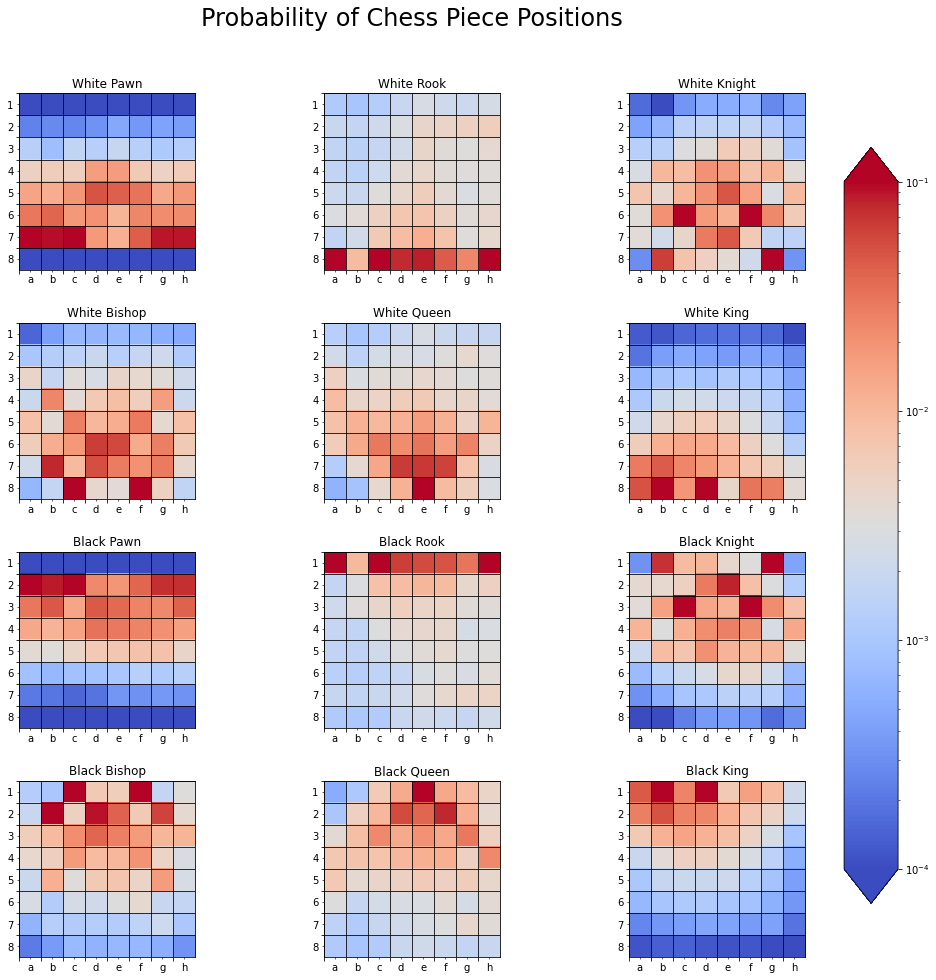

In [145]:
norm = colors.LogNorm(vmin=1e-4, vmax=1e-1) 
cmap = copy.copy(matplotlib.cm.get_cmap('coolwarm'))
cmap.set_bad(cmap(0))
titleOfPiece = {'p': 'Pawn', 'n': 'Knight', 'b': 'Bishop', 'r': 'Rook', 'q': 'Queen', 'k': 'King'}

fig, ax = plt.subplots(4, 3)
fig.set_figheight(15)
fig.set_figwidth(15)

iter = 0
for key in chess_pieces:
  this_ax = ax[np.unravel_index(iter, (4, 3))]
  iter += 1

  color = 'White' if (key.isupper()) else 'Black'
  title = color + ' ' + titleOfPiece[key.lower()]

  iloc = piece_data.columns.get_loc(key)
  data = piece_data.iloc[::-1,  iloc].to_numpy().reshape((8, 8))

  im = this_ax.imshow(data, norm = norm, cmap = cmap)
  
  this_ax.xaxis.set_major_formatter(ticker.NullFormatter())
  this_ax.xaxis.set_major_locator(ticker.FixedLocator([-0.5, 0.5,1.5,2.5,3.5,4.5,5.5, 6.5]))
  this_ax.xaxis.set_minor_locator(ticker.FixedLocator([0, 1, 2, 3, 4, 5, 6, 7]))
  this_ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']))

  this_ax.yaxis.set_major_formatter(ticker.NullFormatter())
  this_ax.yaxis.set_major_locator(ticker.FixedLocator([-0.5, 0.5,1.5,2.5,3.5,4.5,5.5, 6.5]))
  this_ax.yaxis.set_minor_locator(ticker.FixedLocator([0, 1, 2, 3, 4, 5, 6, 7]))
  this_ax.yaxis.set_minor_formatter(ticker.FixedFormatter(['1', '2', '3', '4', '5', '6', '7', '8']))

  this_ax.set_title(title)
  this_ax.grid(color = 'black')


cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = fig.colorbar(im, extend = 'both', cax=cbar_ax)

fig.suptitle('Probability of Chess Piece Positions', fontsize = 24)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    hspace=0.3)

fig.patch.set_facecolor('white')
plt.savefig('../analysis/probanility-chess-position.png', transparent=False)
plt.show()
